[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# KNN random circles


> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 09/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0031ClassifierKnn.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier

# Image Processing

# Machine Learning

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import Plot2DLinearClassifier, PlotBinaryClassData

In [5]:
# General Auxiliary Functions



In [6]:
# Parameters

# Data Generation
numCircles0 = 250
numCircles1 = 250
numSwaps    = 50 #<! Number of samples to swap between inner circle and outer circle
noiseLevel  = 0.03


# Data Visualization
elmSize     = ELM_SIZE_DEF
classColor0 = CLASS_COLOR[0]
classColor1 = CLASS_COLOR[1]

numGridPts = 250

## Generate / Load Data


In [7]:
# Generate Data
numCircles = numCircles0 + numCircles1
mX, vY     = make_circles((numCircles0, numCircles1), shuffle = False, noise = noiseLevel, random_state = seedNum)

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')

The features data shape: (500, 2)
The labels data shape: (500,)


In [8]:
# Swap Data Samples
# Swapping some samples between the classes.
# The first numCircles0 are for class 0.
vSwapIdx = np.random.choice(numCircles0, numSwaps, replace = False)
vY[vSwapIdx] = 1
vSwapIdx = numCircles0 + np.random.choice(numCircles1, numSwaps, replace = False)
vY[vSwapIdx] = 0

### Plot the Data

Text(0, 0.5, 'x2')

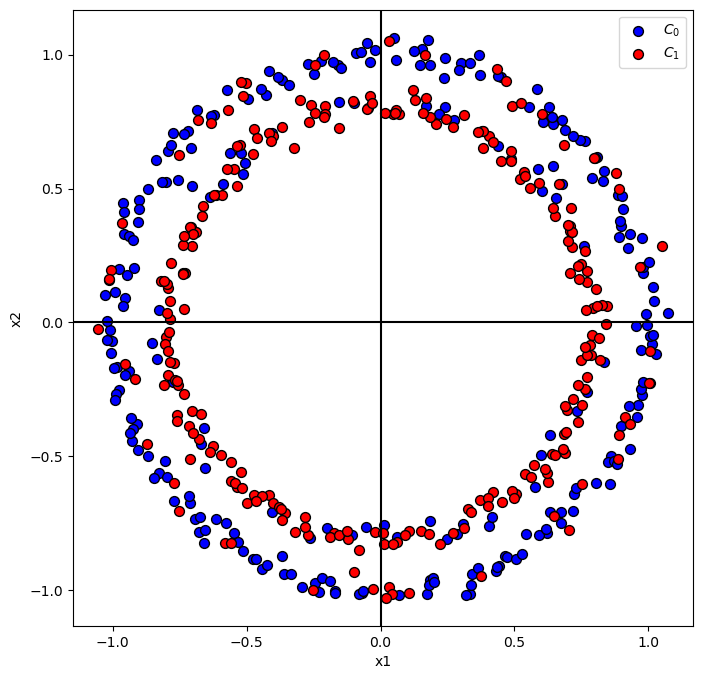

In [9]:
# Display the Data

hA = PlotBinaryClassData(mX, vY)
hA.set_xlabel('x1')
hA.set_ylabel('x2')

## Train a K-NN Classifier

The K-NN classifier, given a new sample $\boldsymbol{x}_{i}$ basically do as following:

1. Find the `K` nearest samples (By the chosen distance function) to the given point.
2. Build an histogram of the classes of the `K` points.
3. Set the class of $\boldsymbol{x}_{i}$ to be the $\arg \max$ of the histogram.

<font color='red'>(**?**)</font> In case there is non unique $\arg \max$ in (3), what should be done?  
<font color='red'>(**?**)</font> Can you think on alternative decision rules for step (3)?  - sum of distances???


In [10]:
# Grid of the data support
v0       = np.linspace(mX[:, 0].min() - 0.1, mX[:, 0].max() + 0.1, numGridPts)
v1       = np.linspace(mX[:, 1].min() - 0.1, mX[:, 1].max() + 0.1, numGridPts)
XX0, XX1 = np.meshgrid(v0, v1)
XX       = np.c_[XX0.ravel(), XX1.ravel()]

def PlotKnn( K ):
    # Train the a K-NN classifier
    oKnnClassifier = KNeighborsClassifier(n_neighbors = K, p = 2).fit(mX, vY) #<! Training on the data
    
    # Plot classification
    Z = oKnnClassifier.predict(XX) #<! Prediction on the grid (The support)
    Z = Z.reshape(XX0.shape)

    hF, hA = plt.subplots(figsize = (8, 8))
    hA = PlotBinaryClassData(mX, vY, hA = hA, axisTitle = f'K-NN Classifier - $K = {K}$')
    hA.contourf(XX0, XX1, Z, colors = [classColor0, classColor1], alpha = 0.3, levels = [-0.5, 0.5, 1.5])

In [11]:
# Display the Geometry of the Classifier

kSlider = IntSlider(min = 1, max = 21, step = 2, value = 1, layout = Layout(width = '30%'))
interact(PlotKnn, K = kSlider)

plt.show()

interactive(children=(IntSlider(value=1, description='K', layout=Layout(width='30%'), max=21, min=1, step=2), …